NAME: DHWANI PATEL

STUDENT ID: 202005125

E-MAIL ID: x2020fvk@stfx.ca

In [1]:
'''The problem definition states: to predict the outcome of the test data of passengers of titanic 
from the given outcomes of survival in train dataset using an appropriate model.'''

'The problem definition states: to predict the outcome of the test data of passengers of titanic \nfrom the given outcomes of survival in train dataset using an appropriate model.'

In [2]:
# importing the required libraries

import pandas as pd
import numpy as np
from statistics import median
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# fixing random seed after few attempts for increased accuracy

np.random.seed(100)

In [4]:
# Loading the datasets

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Working with train data

In [5]:
# Checking the dimensions of data

train_df.shape

(891, 12)

In [6]:
# Displaying the column names

train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Displaying first 5 rows of the train data

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Identifying types of variables

train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Analysis of Continuous variables

In [9]:
# Description of continuous variables 

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Ploting data for greater understanding

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

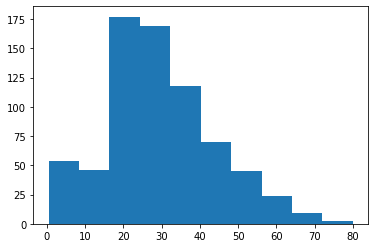

In [10]:
#plotting histogram for age variable

plt.hist(train_df['Age'])

<AxesSubplot:>

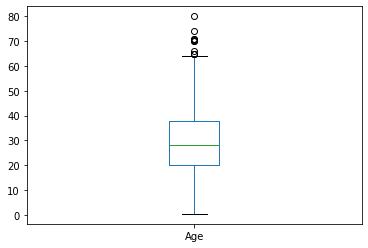

In [11]:
# plotting age variable as boxplot to check for outliers

train_df['Age'].plot.box()

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

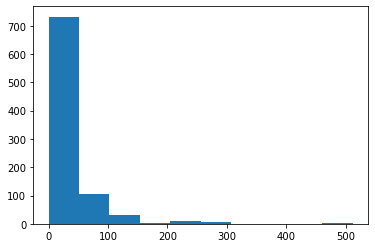

In [12]:
#plotting histogram for fare variable

plt.hist(train_df['Fare'])

<AxesSubplot:>

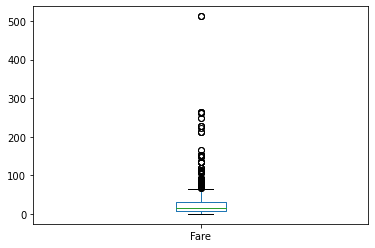

In [13]:
# plotting fare variable as boxplot

train_df['Fare'].plot.box()

<AxesSubplot:>

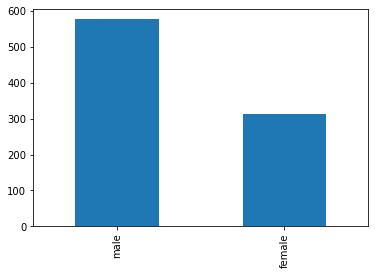

In [14]:
# plotting on bar graph for better visualisation

train_df['Sex'].value_counts().plot.bar()

In [15]:
# checking for frequency of sex variable

train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Checking for correlations between columns

In [16]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [17]:
train_df['Age'].corr(train_df['Fare'])

0.09606669176903887

<AxesSubplot:xlabel='Age', ylabel='Fare'>

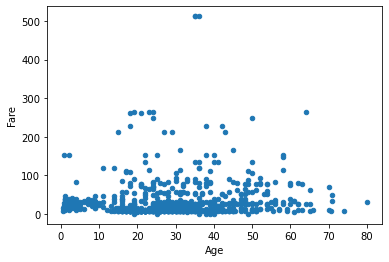

In [18]:
train_df.plot.scatter('Age','Fare')

<AxesSubplot:xlabel='Sex'>

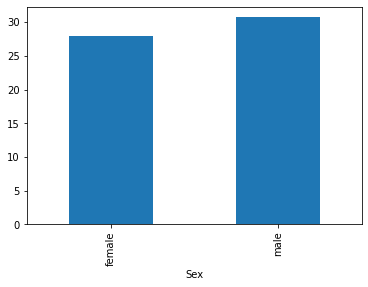

In [19]:
train_df.groupby('Sex')['Age'].mean().plot.bar()

<AxesSubplot:xlabel='Pclass'>

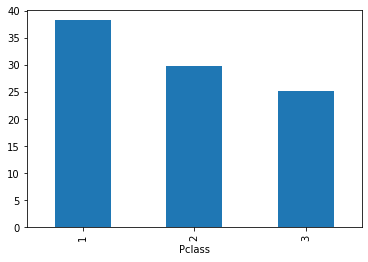

In [20]:
train_df.groupby('Pclass')['Age'].mean().plot.bar()

<AxesSubplot:xlabel='Fare'>

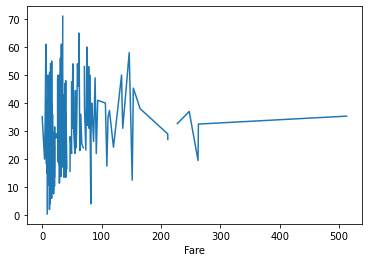

In [21]:
train_df.groupby('Fare')['Age'].mean().plot()

### Checking survival outcome with respect to particular columns

In [22]:
pd.crosstab(train_df['Sex'],train_df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [23]:
pd.crosstab(train_df['Pclass'],train_df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [24]:
pd.crosstab(train_df['Embarked'],train_df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [25]:
pd.crosstab(train_df['Parch'],train_df['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [26]:
pd.crosstab(train_df['SibSp'],train_df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


### Handling missing values 

In [27]:
# Checking for null or missing values

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
# Filling the missing values of Age with the mean value. 
# But as seen earlier, grouping by Pclass may help in better prediction.

age_impute = train_df.groupby(['Pclass']).Age.transform('mean')
train_df.Age.fillna(age_impute, inplace=True)

In [29]:
# Since the Embarked column is catagorical and has only 2 missing values, it can be replaced with the most occuring category.

train_df = train_df.fillna(train_df['Embarked'].value_counts().index[0])

In [30]:
# Filling large amount of entries with 0 or NaN may result to bias in the training process.
# Since cabin has more than 50% values missing, the column can be dropped entirely. 

train_df1 = train_df.drop(['Cabin'], axis=1)

In [31]:
# checking for missing values 

train_df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Deleting insignificant columns

In [33]:
# Checking unique values of Name 

len(train_df1['Name'].unique())

891

In [34]:
# Checking unique values of Ticket

len(train_df1['Ticket'].unique())

681

In [35]:
'''Name and ticket column consists of large number of unique values and 
they do not play a significant role in affecting the survival rate so they can be deleted.'''

del train_df1['Name']
del train_df1['Ticket']

In [36]:
train_df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [37]:
'''There are two columns-SibSp and Parch, giving details about family members and their relationships with one another. 
Combining them to one column that gives the family size.'''

train_df1['family_of'] = train_df1['SibSp'] + train_df1['Parch']
train_df1 = train_df1.drop(['SibSp','Parch'], axis=1)
train_df1.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_of
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


### Better organization of data

<AxesSubplot:>

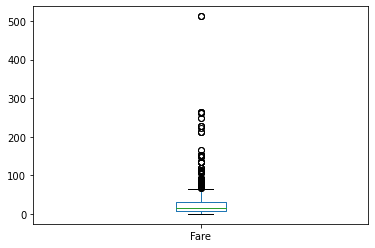

In [38]:
# ploting fare to check for outliers

train_df1['Fare'].plot.box()

<AxesSubplot:>

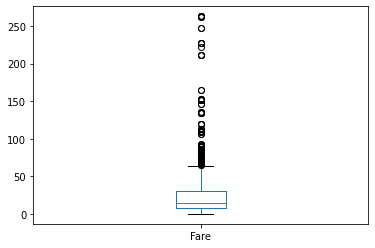

In [39]:
# Extreme values above 300 may be the result of  error. So replacing them with median of fare.

median = float(train_df1['Fare'].median())
train_df1["Fare"] = np.where(train_df1["Fare"] >300, median,train_df1['Fare'])

# plotting again 
train_df1['Fare'].plot.box()

(array([ 54.,  46., 177., 316., 148.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

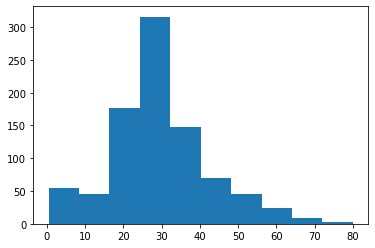

In [40]:
# plotting Age

plt.hist(train_df['Age'])

In [41]:
# Converting Age into age groups by binning

train_df1['age_group'] = pd.cut(x=train_df1['Age'], bins=[0, 18, 40, 100], labels=['Child', 'Adult', 'Elderly'])


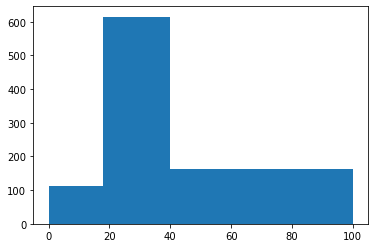

In [42]:
#plotting age according to binning

plt.hist(train_df1['Age'], bins=[0,18,40,100])
plt.show()

In [43]:
# Deleting the Age column

train_df1=train_df1.drop(['Age'], axis=1)

In [44]:
train_df1.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,family_of,age_group
0,1,0,3,male,7.2500,S,1,Adult
1,2,1,1,female,71.2833,C,1,Adult
2,3,1,3,female,7.9250,S,0,Adult
3,4,1,1,female,53.1000,S,1,Adult
4,5,0,3,male,8.0500,S,0,Adult


### Splitting train dataset into features and response

In [45]:
X=train_df1.drop('Survived',axis=1)
Y=train_df1['Survived']

In [46]:
X.head()

,PassengerId,Pclass,Sex,Fare,Embarked,family_of,age_group
0,1,3,male,7.2500,S,1,Adult
1,2,1,female,71.2833,C,1,Adult
2,3,3,female,7.9250,S,0,Adult
3,4,1,female,53.1000,S,1,Adult
4,5,3,male,8.0500,S,0,Adult


In [47]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Data encoding for categorical columns

In [48]:
# Converting the categories into labels

LabelEncoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X.head(10)

,PassengerId,Pclass,Sex,Fare,Embarked,family_of,age_group
0,0,2,1,18,2,1,0
1,1,0,0,207,0,1,0
2,2,2,0,41,2,0,0
3,3,0,0,189,2,1,0
4,4,2,1,43,2,0,0
5,5,2,1,51,1,0,0
6,6,0,1,186,2,0,2
7,7,2,1,124,2,4,1
8,8,2,0,74,2,2,0
9,9,1,0,154,0,1,1


# Working with test data

In [49]:
# Displaying first 5 rows of test.csv

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Transforming the test data similar to train data

### Handling missing data and deleting columns

In [51]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [52]:
# Replacing missing values of age with mean grouped by Pclass

age_impute = test_df.groupby(['Pclass']).Age.transform('mean')
test_df.Age.fillna(age_impute, inplace=True)

#Replacing missing values of fare with mean

test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)


### Deleting columns 

In [53]:
test_df1=test_df.drop(['Name','Ticket', 'Cabin'], axis=1)

In [54]:
#Making new column of family, same as train data

test_df1['family_of'] = test_df1['SibSp'] + test_df1['Parch']
test_df1=test_df1.drop(['SibSp','Parch'], axis=1)

### Organizing test data

In [55]:
#Forming bins of age

test_df1['age_group'] = pd.cut(x=test_df1['Age'], bins=[0, 18, 40, 100], labels=['children', 'Adults', 'Elderly'])
test_df1=test_df1.drop(['Age'], axis=1)

In [56]:
#Replacing extreme values with median of fare

med = float(test_df['Fare'].median())
test_df["Fare"] = np.where(test_df["Fare"] >300 , med,test_df['Fare'])

In [57]:
test_df1.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Fare           0
Embarked       0
family_of      0
age_group      0
dtype: int64

### Encoding test dataset

In [58]:
LabelEncoder_test_df1 = LabelEncoder()
test_df1 = test_df1.apply(LabelEncoder().fit_transform)
test_df1.head()

,PassengerId,Pclass,Sex,Fare,Embarked,family_of,age_group
0,0,2,1,24,1,0,0
1,1,2,0,5,2,1,1
2,2,1,1,41,1,0,1
3,3,2,1,34,2,0,0
4,4,2,0,46,2,2,0


### Scaling features of train and test datsets using StandardScaler

In [59]:
sc = StandardScaler()
X = sc.fit_transform(X)
test_df1 = sc.transform(test_df1)

# Model formation

### Checking for accuracy

In [60]:
# Comparing accuracies of a few models and selecting the one with highest cross_val_score value

models = [RandomForestClassifier(),
          GaussianNB(), 
          LogisticRegression(), 
          DecisionTreeClassifier()]

for model in models:
    score = cross_val_score(model, X, Y, cv=10, scoring = 'accuracy')
    print(score.mean())

0.8002372034956305
0.7767041198501872
0.7923720349563046
0.7430711610486892


### Finding best parameters

In [61]:
# As per the results we select Random Forest Classifier as our model
# Using gridsearchCV to find out best parameters of model

rfc = RandomForestClassifier()
parameter_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_cv = GridSearchCV(estimator=rfc, param_grid=parameter_grid, cv=10)
rfc_cv.fit(X, Y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [62]:
#Displaying the best suitable parameters

rfc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [65]:
#Setting parameters according to the above output

rfc1=RandomForestClassifier(max_features='log2', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(X,Y)
pred_rfc = rfc1.predict(test_df1)

In [66]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': pred_rfc})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
